<a href="https://colab.research.google.com/github/Skull-7/Olympics-data-analytics/blob/main/Olympics_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the data from CSV file

In [440]:
athlete=pd.read_csv('/content/athlete_events.csv')
noc=pd.read_csv('/content/noc_regions.csv')

# Making a copy of Dataset

In [441]:
ath=athlete.copy()
nat=noc.copy()

# Data Exploration


In [442]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [443]:
ath.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [444]:
nat.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [445]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [446]:
ath.shape

(271116, 15)

In [447]:
nat.shape

(230, 3)

In [448]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [449]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [450]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [451]:
nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [452]:
nat.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [453]:
nat.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [454]:
ath['NOC'].isnull().sum()

0

In [455]:
nat['NOC'].isnull().sum()

0

# Data Cleaning and Data Manipulation

1. Changing the NOC columns with region column which present in the noc dataset/

In [456]:
at=ath.merge(nat,how="left",on='NOC')

In [457]:
at

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [458]:
at.drop(columns=['notes',"NOC"],inplace=True)

In [459]:
new_pose=at['region']
at.drop(columns=['region'],inplace=True)

In [460]:
at.insert(7,'region',new_pose)

In [461]:
at

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


2. Checking for null values

In [462]:
at.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

3. Changing the null values in Age, Height and Weight with the mean value of the respected columns

In [463]:
at['Age'].mean()

25.556898357297374

In [464]:
at['Height'].mean()

175.33896987366376

In [465]:
at['Weight'].mean()

70.70239290053351

* Note - In age column we dont need any floating values as we know age can't be a decimel digit

In [466]:
at['Age'].fillna(round(at['Age'].mean(),0),inplace=True)
at['Height'].fillna(round(at['Height'].mean(),2),inplace=True)
at['Weight'].fillna(round(at['Weight'].mean(),2),inplace=True)

In [467]:
at.isnull().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [468]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


4. Now lets check for region and what can we do about the null values

In [469]:
at[at['region'].isnull()]

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.34,70.7,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.34,70.7,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.00,68.0,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.00,61.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.00,75.0,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,134454,Zhang Guirong,F,26.0,182.00,95.0,Singapore,NaN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN
268753,134454,Zhang Guirong,F,30.0,182.00,95.0,Singapore,NaN,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN
268993,134587,Zhang Xueling,F,21.0,163.00,53.0,Singapore,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN
268994,134587,Zhang Xueling,F,21.0,163.00,53.0,Singapore-1,NaN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN


In [470]:
nat.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [471]:
nat.where(nat['region']=="Singapore")

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


* So after checking NOC dataset there are some null value so we will handle it late

5. Changing the Medal values with numbers
    * nan->0
    * Gold->1
    * Silver->2
    * Bronze->3

In [472]:
at['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [473]:
at['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [474]:
at['Medal'].isnull().sum()

231333

In [475]:
at['Medal']=at['Medal'].replace([np.nan,"Gold","Silver","Bronze"],[0,1,2,3])

In [476]:
at['Medal'].value_counts()

0    231333
1     13372
3     13295
2     13116
Name: Medal, dtype: int64

In [477]:
at.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'region',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

6. Droping region and Games columns for athlete dataset
 * Reason-
    1. region column is useless because in Team column is also having the countries name
    2. Games data is just the collection of Year and Season Column

In [478]:
at.drop(columns=['region','Games'],inplace=True)

In [479]:
at

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.34,70.7,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.34,70.7,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00,89.0,Poland-1,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.00,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.00,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00,96.0,Poland,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


7. Cleaning the Event data

In [480]:
at['Event'] = at['Event'].astype(str)
for sport in at['Sport'].unique():
    pattern = f'^{sport} '
    at['Event'] = at['Event'].str.replace(pattern, '')

<ipython-input-480-f357eb006a5f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  at['Event'] = at['Event'].str.replace(pattern, '')


In [481]:
at

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.34,70.7,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.34,70.7,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00,89.0,Poland-1,1976,Winter,Innsbruck,Luge,Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.00,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.00,59.0,Poland,2014,Winter,Sochi,Ski Jumping,"Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00,96.0,Poland,1998,Winter,Nagano,Bobsleigh,Men's Four,0


In [482]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 29.0+ MB


In [483]:
at['Age']=at['Age'].astype(int)

In [484]:
at['Age'].dtype

dtype('int64')

#Data Exporting

In [485]:
at.to_json("Athlete_data.json")
at.to_csv("Athlete_data.csv")
at.to_excel("Athlete_data.xlsx")

Exception ignored in: <function ZipFile.__del__ at 0x7ce5ee8a6320>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


#Data Analysis

Q1 Relation between Height and Weight

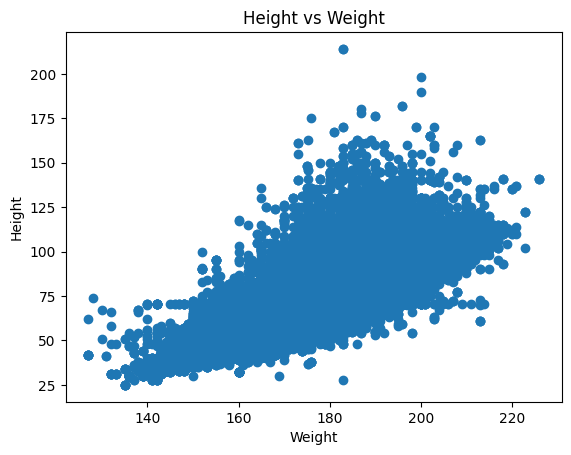

In [486]:
plt.scatter(at['Height'],at['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")
plt.show()

* Conclusion: From the analysis of the graph, it is evident that there exists a significant correlation between the variables under consideration. As the height increases, the weight tends to increase as well, or conversely, as the weight increases, the height tends to increase. This suggests a dependent relationship between height and weight, indicating a potential association or influence between these two variables.

In [487]:
at.describe()

,ID,Age,Height,Weight,Year,Medal
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.572382,175.339198,70.701838,1978.378480,0.293192
std,39022.286345,6.281384,9.278100,12.574690,29.877632,0.773445
min,1.000000,10.000000,127.000000,25.000000,1896.000000,0.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000,0.000000
50%,68205.000000,25.000000,175.340000,70.700000,1988.000000,0.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000,0.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,3.000000


Q2 Total number of partcipant present in the event as per male and female

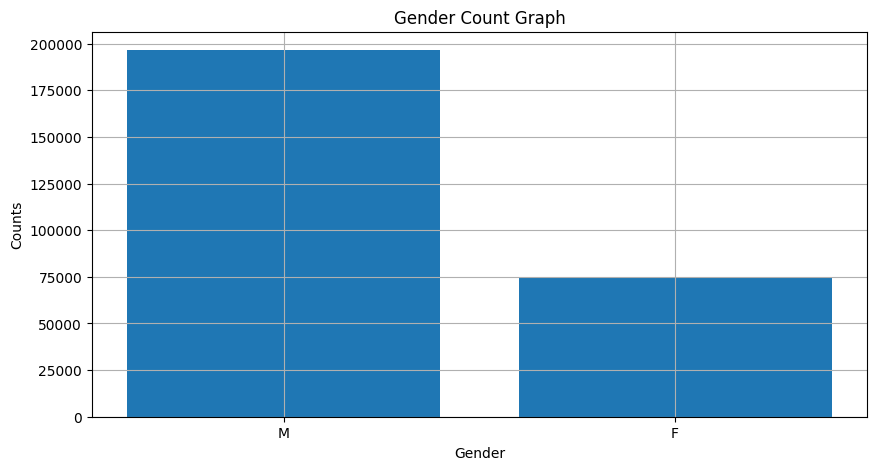

In [488]:
plt.figure(figsize=(10,5))
plt.bar(at['Gender'].value_counts().index,at['Gender'].value_counts().values)
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title('Gender Count Graph')
plt.grid()
plt.show()

* Conclusion: Upon examining this graph, it becomes apparent that the participation rate of females in the Olympics from 1896 to 2016 consistently remains below 50% when compared to male participation. This suggests a gender disparity in Olympic participation throughout this period, with males typically comprising a larger portion of the participants

Q3 Total number of participant as per Summer and Winter olympics

In [489]:
summer_participents=at[at['Season']=="Summer"]
Winter_participents=at[at['Season']=="Winter"]

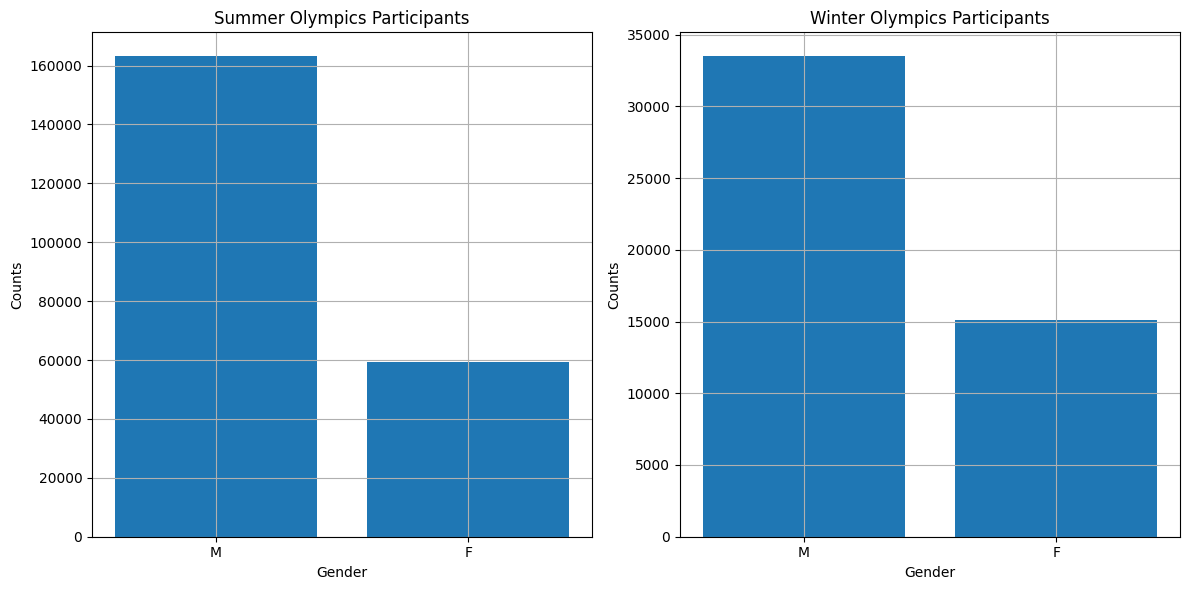

In [490]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].bar(summer_participents['Gender'].value_counts().index, summer_participents['Gender'].value_counts().values)
axes[0].grid()
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Counts")
axes[0].set_title("Summer Olympics Participants")
axes[1].bar(Winter_participents['Gender'].value_counts().index, Winter_participents['Gender'].value_counts().values)
axes[1].grid()
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Counts")
axes[1].set_title("Winter Olympics Participants")
plt.tight_layout()

* Conclution: There is not much difference in the participation but with this graph we can say that there are more participants in Summer olympics then Winter olympics

Q4 Ploting a graph to show the top five countries which has the most number of medals

In [491]:
medal_count={}
Country=at['Team'].unique()
Total_wins=[]
Total_loss=[]
Gold=[]
Silver=[]
Bronze=[]
for i in at['Team'].unique():
  team_df=at[at['Team']==i]
  Total_wins.append(team_df['Medal'].value_counts()[1:].sum())
  Total_loss.append(team_df['Medal'].value_counts()[0:1].sum())
  Gold.append(team_df['Medal'].value_counts()[1:2].sum())
  Silver.append(team_df['Medal'].value_counts()[2:3].sum())
  Bronze.append(team_df['Medal'].value_counts()[3:4].sum())

In [499]:
data={"Country":Country,"Wins":Total_wins,"Gold":Gold,"Silver":Silver,"Bronze":Bronze,"Loss":Total_loss}
win_loss_country=pd.DataFrame(data)

In [494]:
win_loss_country

,Country,Wins,Gold,Silver,Bronze,Loss
0,China,100,41,32,27,404
1,Denmark,93,35,35,23,508
2,Denmark/Sweden,0,0,0,0,1
3,Netherlands,251,106,87,58,1144
4,United States,1292,618,369,305,3216
...,...,...,...,...,...,...
776,Bella,0,0,0,0,1
777,May-Be 1960,0,0,0,0,1
778,May Be,0,0,0,0,1
779,Inga-Lill XXXXIII,0,0,0,0,1


In [495]:
win_loss_country.to_csv('Win Loss Data By Countries.csv')
win_loss_country.to_json('Win Loss Data By Countries.json')
win_loss_country.to_excel('Win Loss Data By Countries.xlsx')

* To solve this problem i have also created a new Dataset so that any can use that dataset in excel or somewhere else

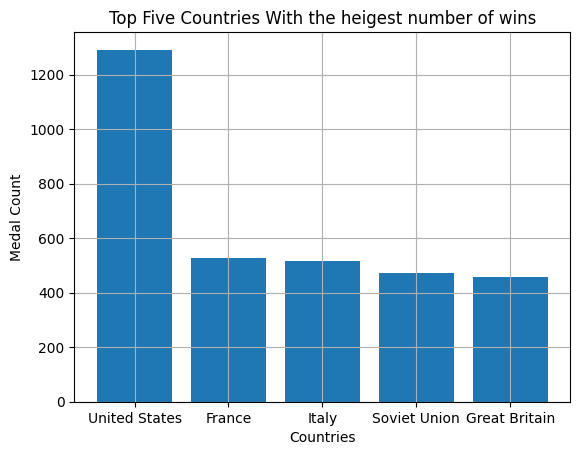

In [496]:
top_five_countries=win_loss_country.sort_values(by="Wins",ascending=False).head()
plt.bar(top_five_countries["Country"],top_five_countries["Wins"])
plt.xlabel("Countries")
plt.ylabel("Medal Count")
plt.title("Top Five Countries With the heigest number of wins")
plt.grid()
plt.show()

* Conclusion:Based on the graph provided, it is evident that the United States has won the highest number of medals, followed by France, Italy, the Soviet Union, and Great Britain, in that order. This observation highlights the dominance of certain countries in Olympic medal standings, with the United States leading by a considerable margin over other nations.

In [497]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 37.0+ MB


In [498]:
at.isnull().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64